c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 32 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


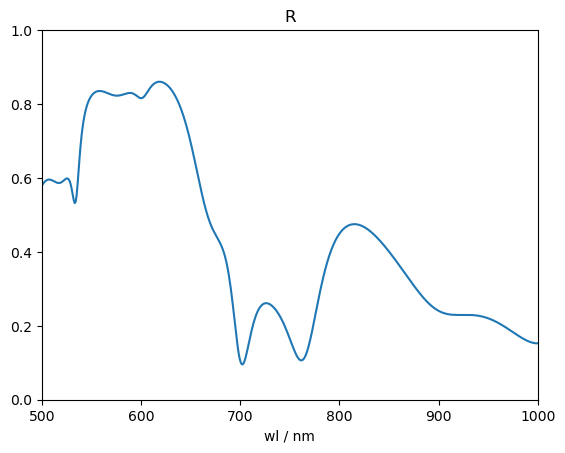

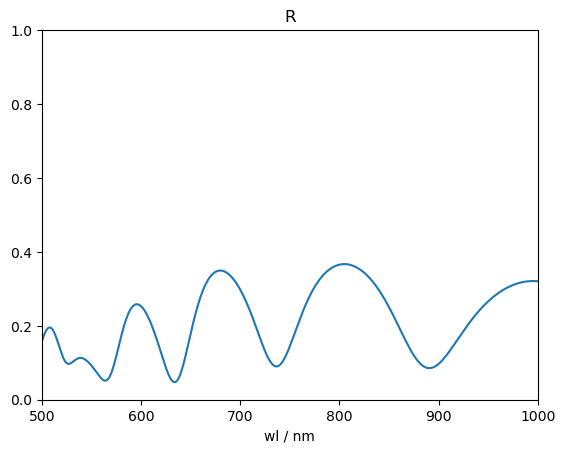

In [1]:
import sys
sys.path.append('./../../designer/script/')
from gets.get_spectrum import get_spectrum_simple
from design import DesignSimple
from film import FilmSimple
from spectrum import SpectrumSimple
from utils.plot_spectrum import plot_spectrum
from utils.load_designs import load_designs_single_spec as load_designs
from utils.sort import sort_by_ith_list
import numpy as np
import copy
from utils.loss import calculate_RMS
import matplotlib.pyplot as plt

# Initialize: config for TML
WLS = np.linspace(500, 1000, 500)
INC_ANG = 60.
wl = 750. # wl used for calculating OT

def plot_film(f: FilmSimple):
    f.add_spec_param(INC_ANG, WLS)
    spec_target = f.get_spec()
    spec_target.calculate() # compile cuda kernel func
    plot_spectrum(spec_target)

np.random.seed(1)
f_target_30layers = FilmSimple("SiO2", "TiO2", "SiO2", np.random.random(30) * 100) # target film
plot_film(f_target_30layers)

np.random.seed(1)
f_target_4layers = FilmSimple("SiO2", "TiO2", "SiO2", np.random.random(4) * 750) # target film
plot_film(f_target_4layers)

In [2]:
# Load trained films data and construct Design objects
runs_dict = {
            "SiO2_30layers": {},
            "TiO2_30layers": {},
            "SiO2_4layers": {},
            "TiO2_4layers": {}    
            }
runs_dict['SiO2_30layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_SiO2_target30layers/'
runs_dict['TiO2_30layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_TiO2_target30layers/'
runs_dict['SiO2_4layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/'
runs_dict['TiO2_4layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_TiO2_target4layers/'

runs_dict['SiO2_30layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_SiO2_target30layers/'
runs_dict['TiO2_30layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_TiO2_target30layers/'
runs_dict['SiO2_4layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_SiO2_target4layers/'
runs_dict['TiO2_4layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_TiO2_target4layers/'


runs_dict['SiO2_30layers']['designs'] = load_designs(runs_dict['SiO2_30layers']['file_dir'], f_target_30layers, n_A='SiO2', n_B='TiO2', n_sub='SiO2')
runs_dict['TiO2_30layers']['designs'] = load_designs(runs_dict['TiO2_30layers']['file_dir'], f_target_30layers, n_A='TiO2', n_B='SiO2', n_sub='SiO2')
runs_dict['SiO2_4layers']['designs'] = load_designs(runs_dict['SiO2_4layers']['file_dir'], f_target_4layers, n_A='SiO2', n_B='TiO2', n_sub='SiO2')
runs_dict['TiO2_4layers']['designs'] = load_designs(runs_dict['TiO2_4layers']['file_dir'], f_target_4layers, n_A='TiO2', n_B='SiO2', n_sub='SiO2')

Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)


c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\OT-loss\./../../designer/script\utils\load_designs.py:31: UserWarning: loadtxt: input contained no data: "./../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/run_23/iter_0"
  np.loadtxt(file_dir + f'run_{run_idx}/iter_0', dtype=float)*1000.
c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\OT-loss\./../../designer/script\utils\load_designs.py:31: UserWarning: loadtxt: input contained no data: "./../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/run_31/iter_0"
  np.loadtxt(file_dir + f'run_{run_idx}/iter_0', dtype=float)*1000.
c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\OT-loss\./../../designer/script\utils\load_designs.py:31: UserWarning: loadtxt: input contained no data: "./../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/run_32/iter_0"
  np.loadtxt(file_dir + f'run_{run_idx}/iter_0', dtype=float)*1000.
c:\Users\rfeng6\Desktop\working\Thin-Film-Design\working\OT-loss\./../

Trained film should not have zero geometric thickness (run 0)


c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\matplotlib\transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
C:\Users\rfeng6\AppData\Local\Temp\ipykernel_9860\4171843021.py:41: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 0.4) # set lower bound of y to zero


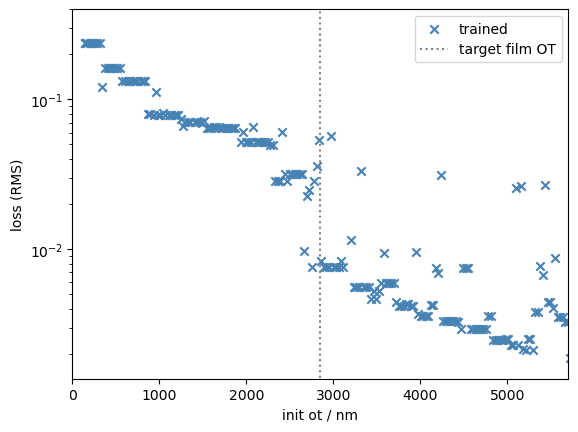

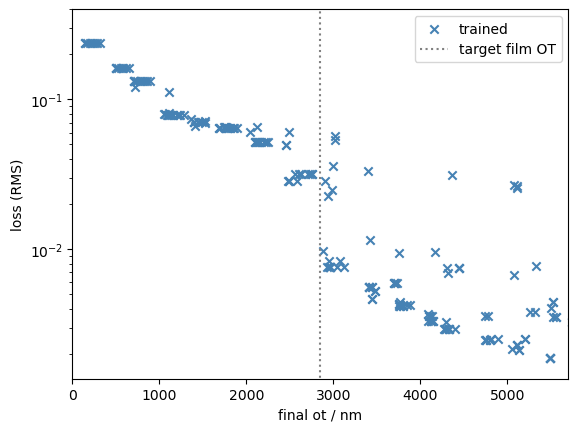

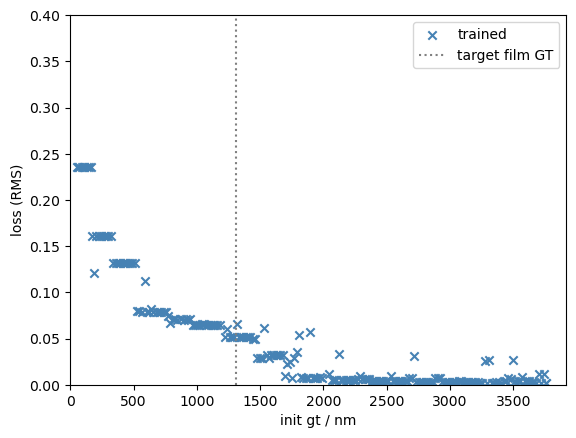

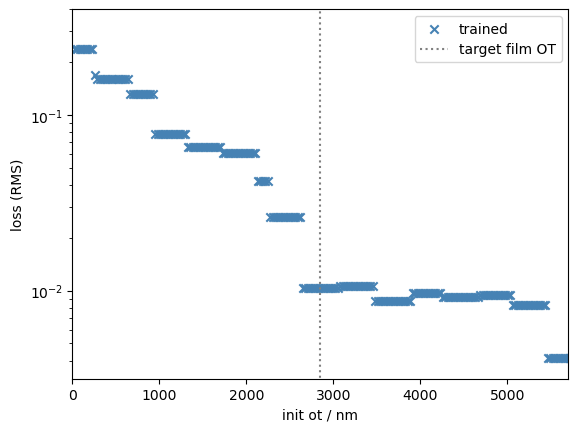

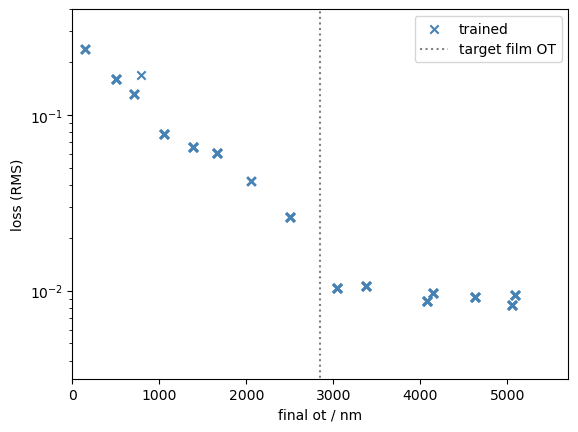

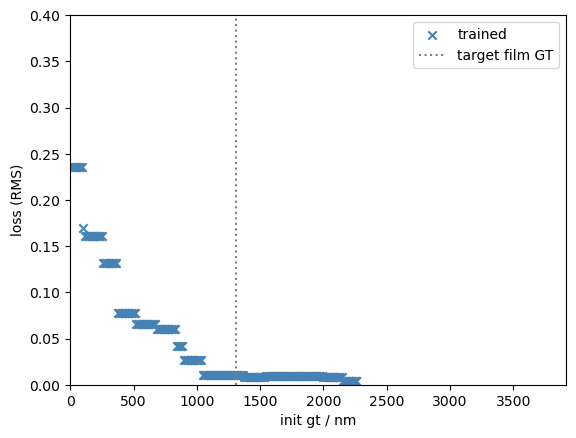

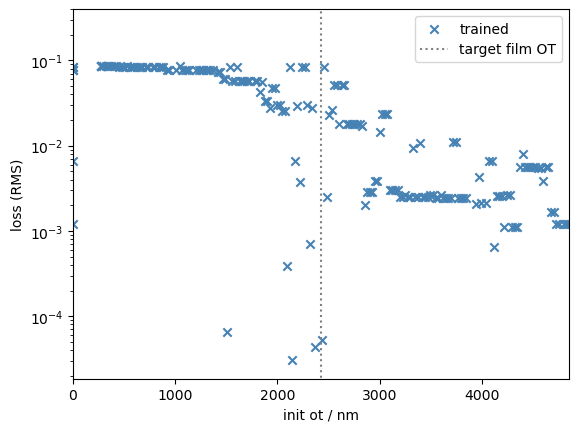

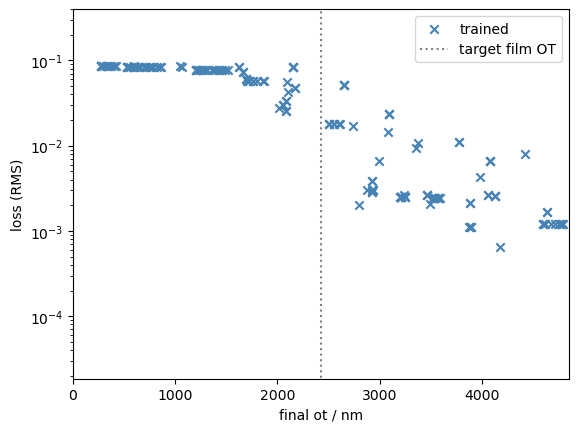

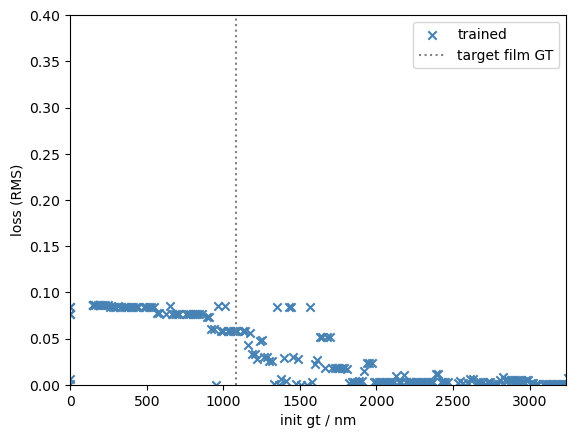

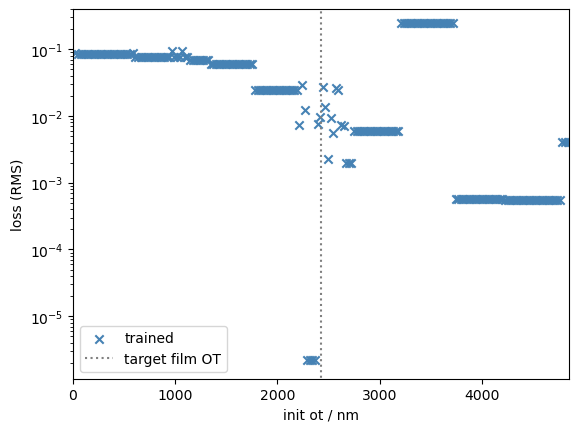

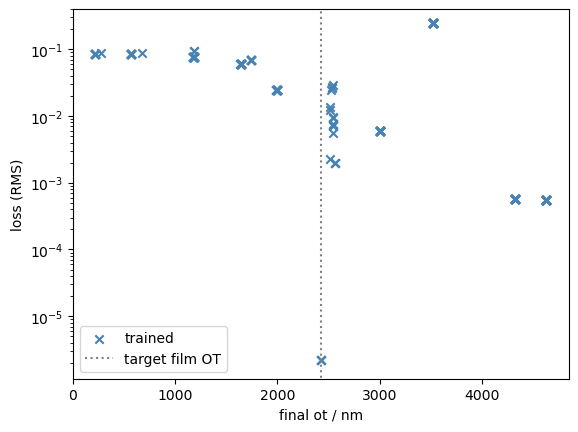

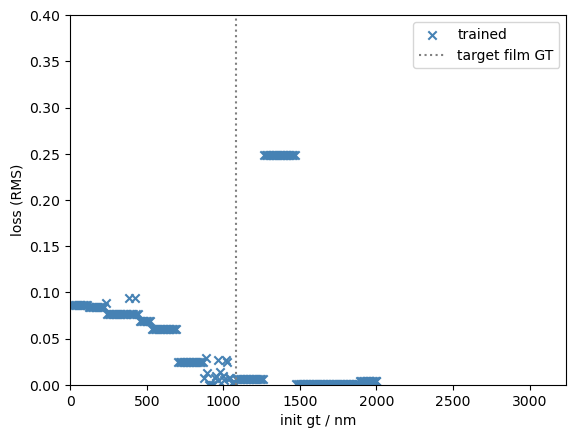

In [3]:
def plot(design_list: list[DesignSimple], x='wrt init ot'):
    target_ot = design_list[0].get_target_ot(wl)
    target_thickness = design_list[0].get_target_gt()
             
    fig, ax = plt.subplots(1, 1)

    if x == 'wrt init ot':
        for design in design_list:
            ax.scatter(design.get_init_ot(wl), design.loss, c='steelblue', marker='x')
        # scatter the first dot for the legend
        ax.scatter(design.get_init_ot(wl), design.loss, c='steelblue', marker='x', label='trained')
        ax.plot([target_ot, target_ot], [0, 1], label='target film OT', c='gray', ls=':')

        ax.set_xlabel('init ot / nm')
        ax.set_xlim(0, target_ot * 2)
        ax.set_yscale('log')

    elif x == 'wrt final ot':
        for design in design_list:
            ax.scatter(design.get_current_ot(wl), design.loss, c='steelblue', marker='x')
        # scatter the first dot for the legend
        ax.scatter(design.get_current_ot(wl), design.loss, c='steelblue', marker='x', label='trained')
        ax.plot([target_ot, target_ot], [0, 1], label='target film OT', c='gray', ls=':')
        
        ax.set_xlabel('final ot / nm')
        ax.set_xlim(0, target_ot * 2)
        ax.set_yscale('log')

    elif x == 'wrt init gt': # geometrical thickness
        for design in design_list:
            ax.scatter(design.get_init_gt(), design.loss, c='steelblue', marker='x')
        # scatter the first dot for the legend
        ax.scatter(design.get_init_gt(), design.loss, c='steelblue', marker='x', label='trained')
        ax.plot([target_thickness, target_thickness], [0, 1], label='target film GT', c='gray', ls=':')
        
        ax.set_xlabel('init gt / nm')
        ax.set_xlim(0, target_thickness * 3)

    ax.legend()
    ax.set_ylabel('loss (RMS)')
    ax.set_ylim(0, 0.4) # set lower bound of y to zero



    return fig


for run_name in runs_dict:
    fig = plot(runs_dict[run_name]['designs'], 'wrt init ot').savefig(runs_dict[run_name]['save_fig_dir'] + 'log_loss-initial_ot.png', dpi=300)
    fig = plot(runs_dict[run_name]['designs'], 'wrt final ot').savefig(runs_dict[run_name]['save_fig_dir'] + 'log_loss-final_ot.png', dpi=300)
    fig = plot(runs_dict[run_name]['designs'], 'wrt init gt').savefig(runs_dict[run_name]['save_fig_dir'] + 'loss-initial_gt.png', dpi=300)
    

# plot(designs_SiO2_target_30layers, 'wrt final ot').savefig(save_fig_dir_SiO2 + 'loss-final_ot.png', dpi=300)
# plot(designs_TiO2_target_30layers, 'wrt final ot').savefig(save_fig_dir_TiO2 + 'loss-final_ot.png', dpi=300)
# plot(designs_SiO2_target4, 'wrt final ot').savefig(save_fig_dir_SiO2_target_4layers + 'loss-final_ot.png', dpi=300)

# plot(designs_SiO2_target_30layers, 'wrt init gt').savefig(save_fig_dir_SiO2 + 'loss-initial_gt.png', dpi=300)
# plot(designs_TiO2_target_30layers, 'wrt init gt').savefig(save_fig_dir_TiO2 + 'loss-initial_gt.png', dpi=300)
# plot(designs_SiO2_target4, 'wrt init gt').savefig(save_fig_dir_SiO2_target_4layers + 'loss-initial_gt.png', dpi=300)

C:\Users\rfeng6\AppData\Local\Temp\ipykernel_9860\3842401935.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1)


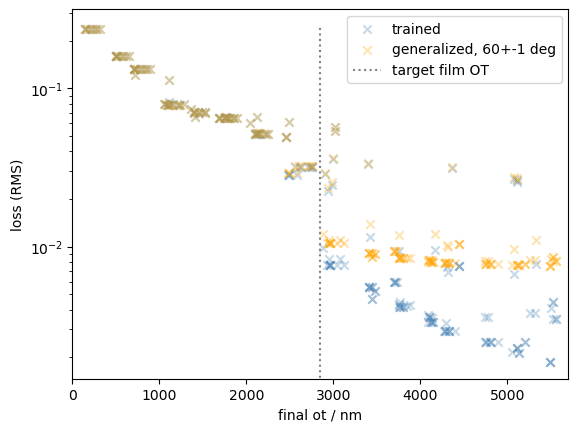

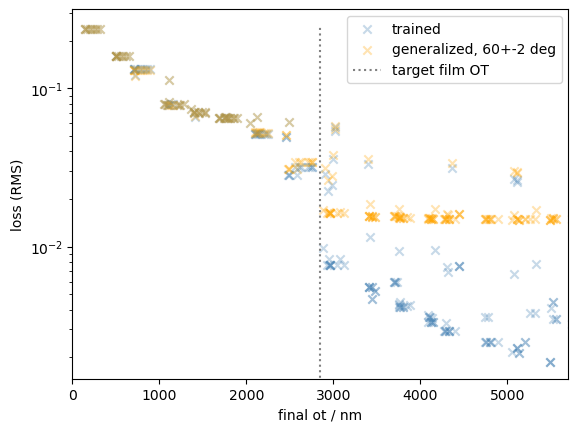

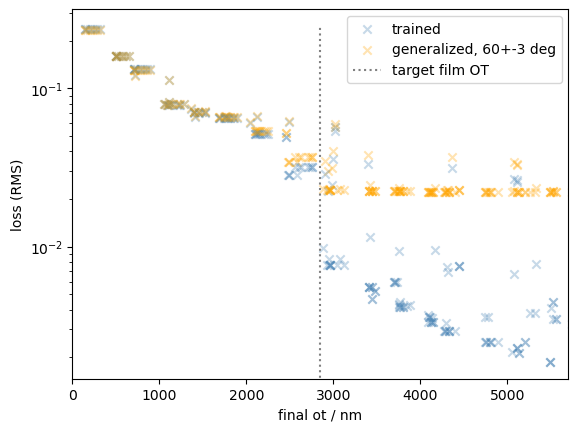

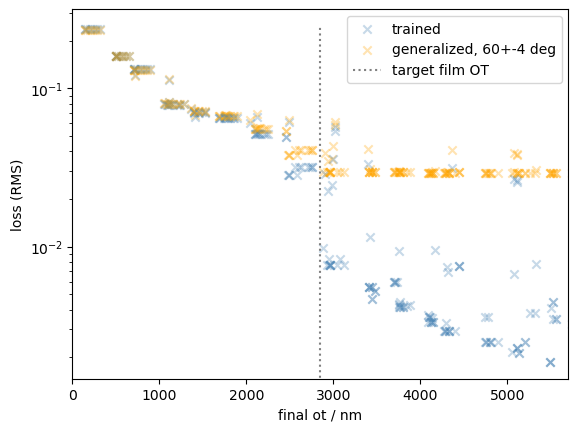

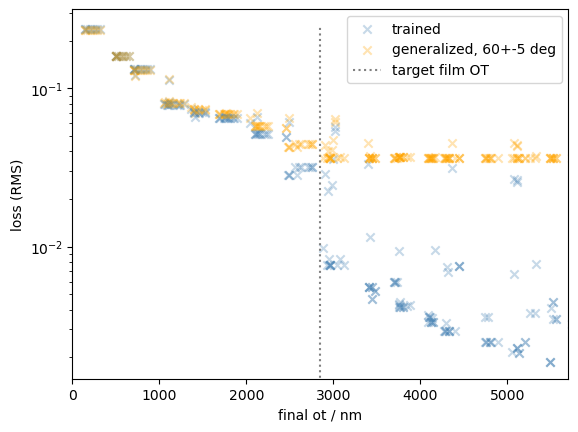

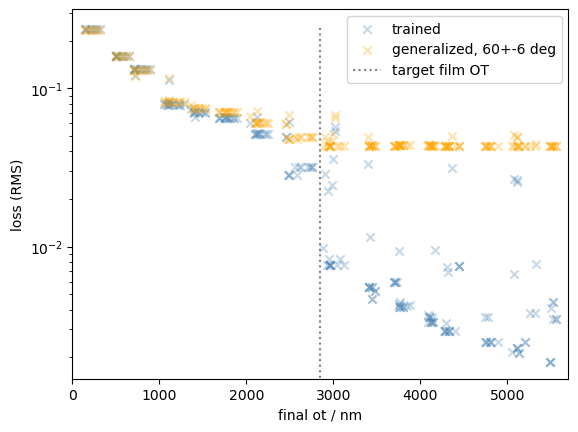

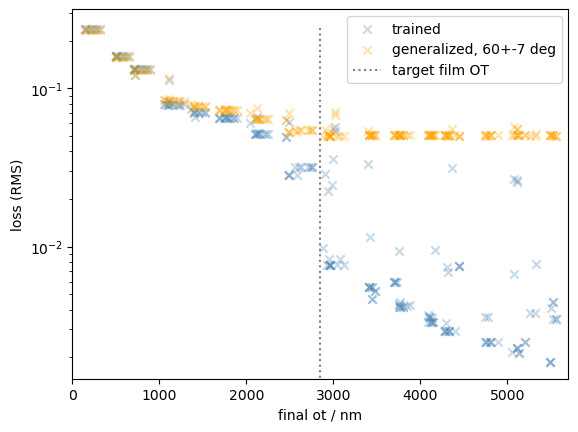

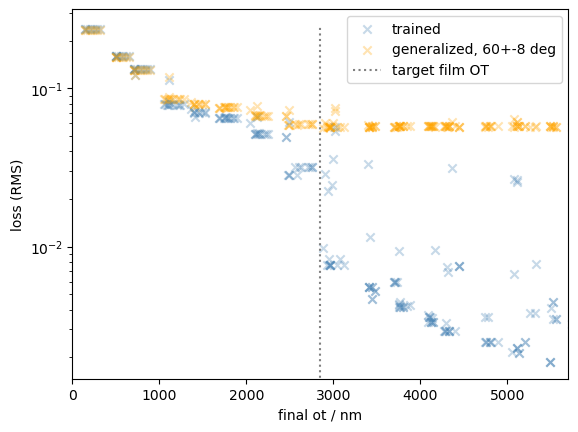

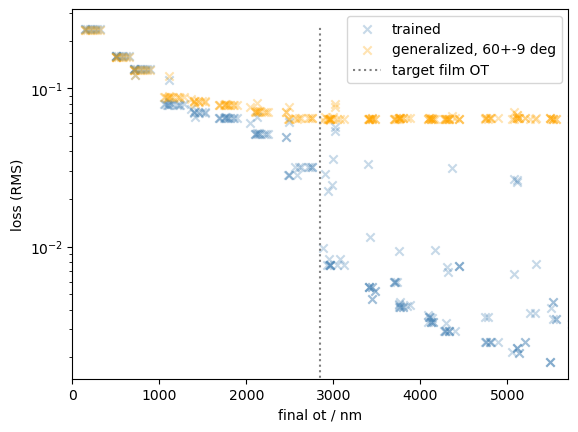

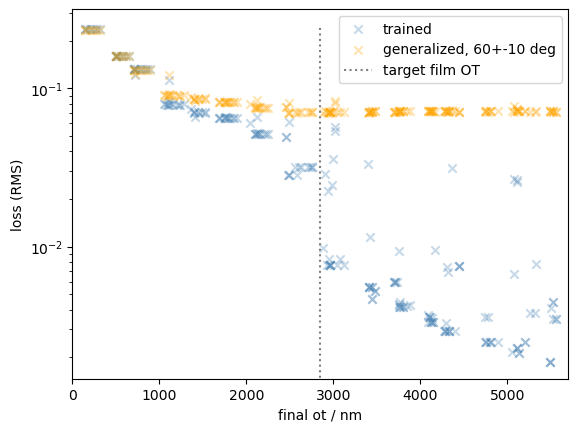

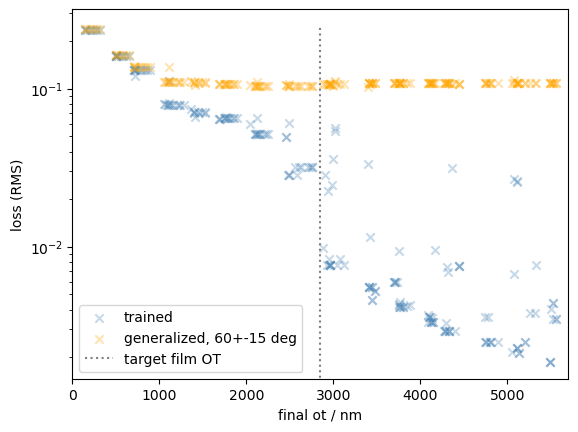

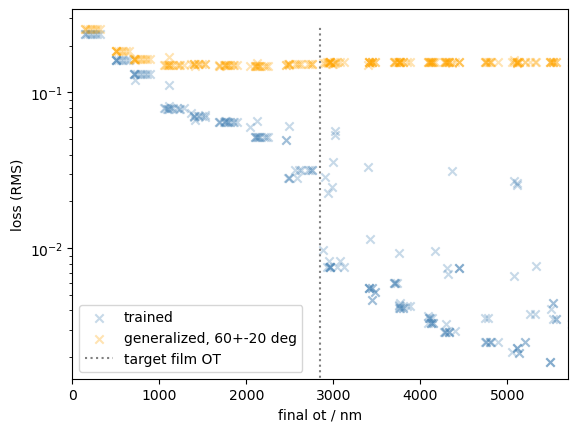

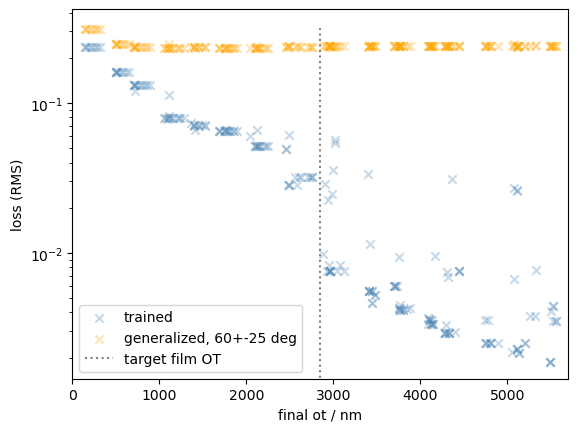

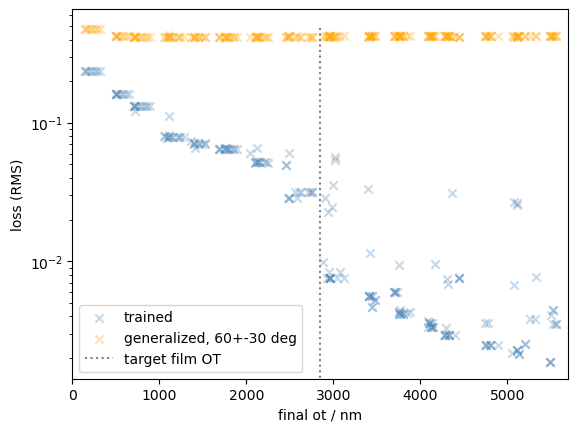

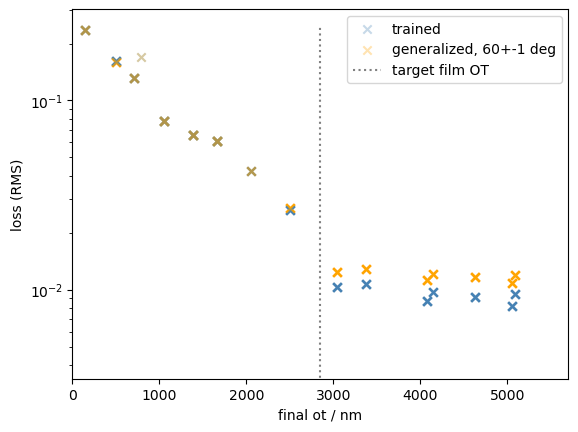

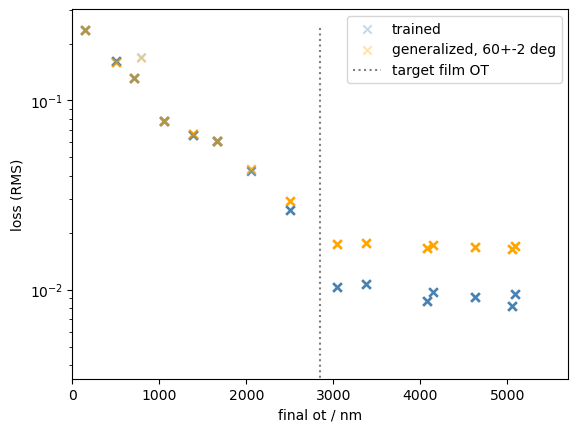

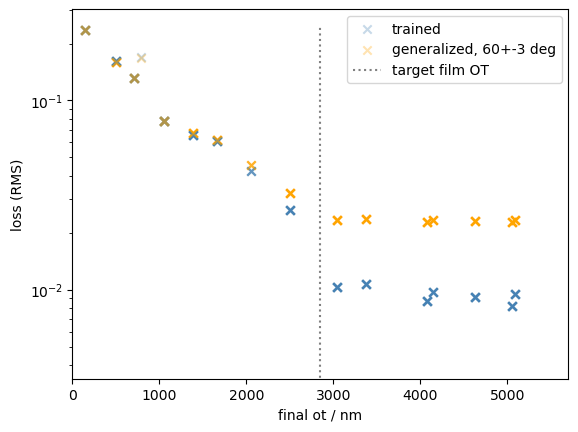

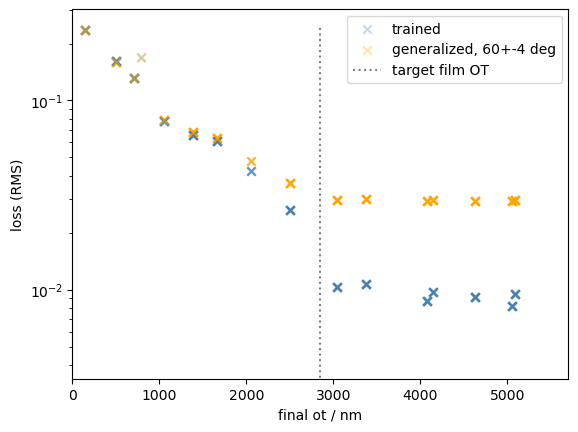

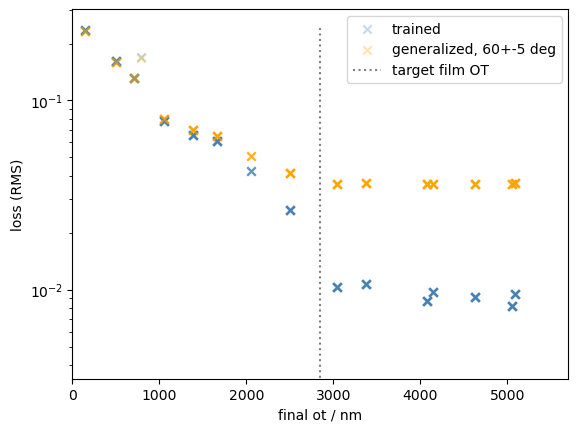

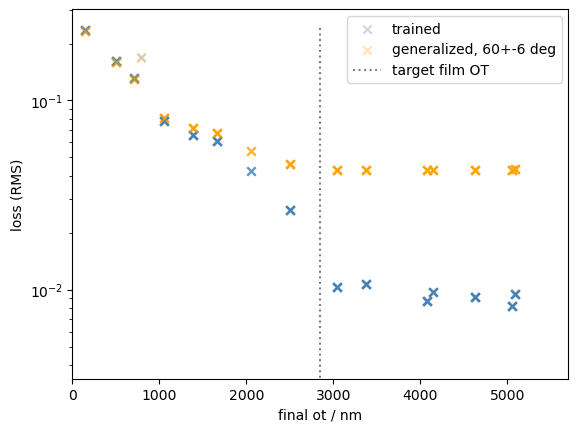

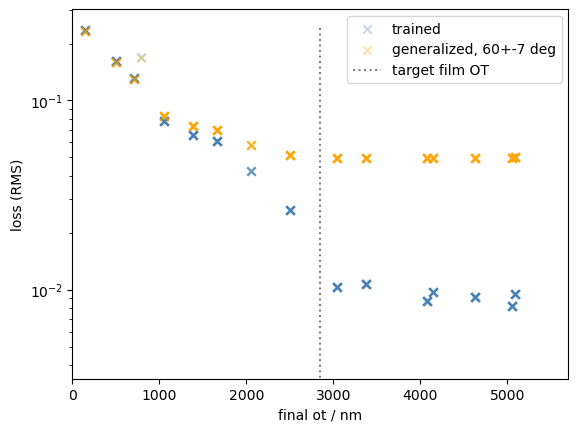

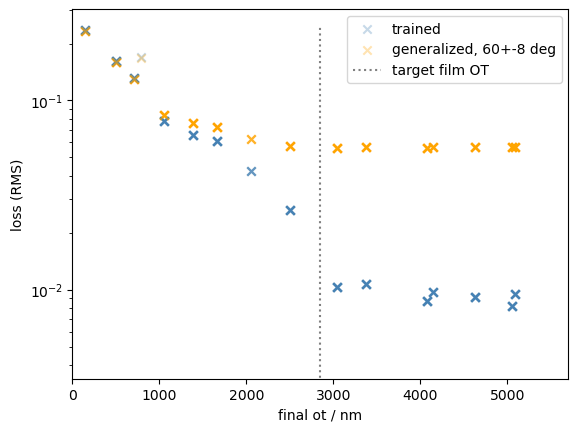

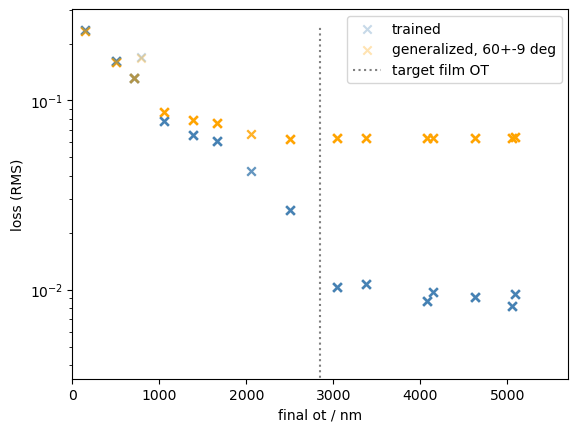

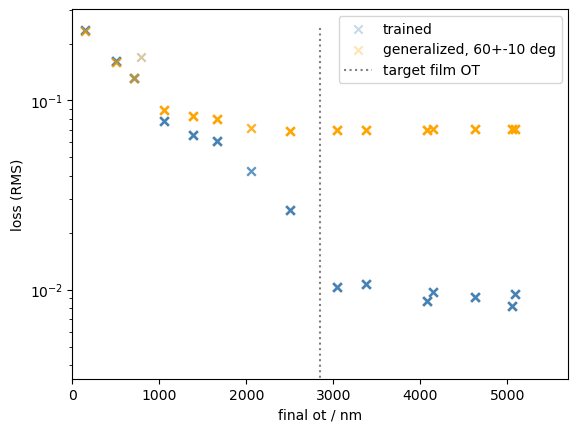

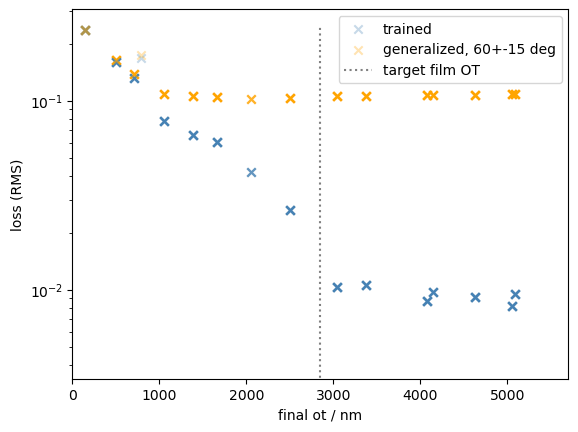

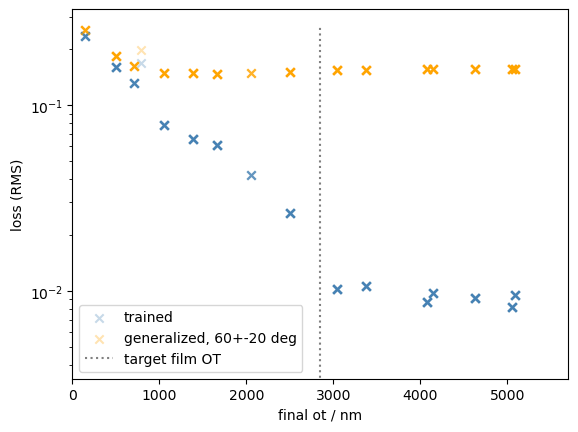

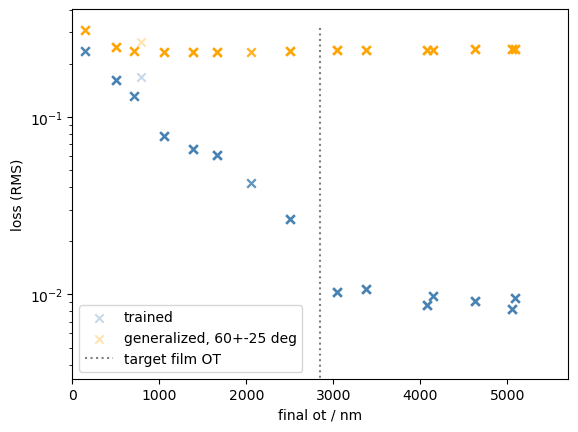

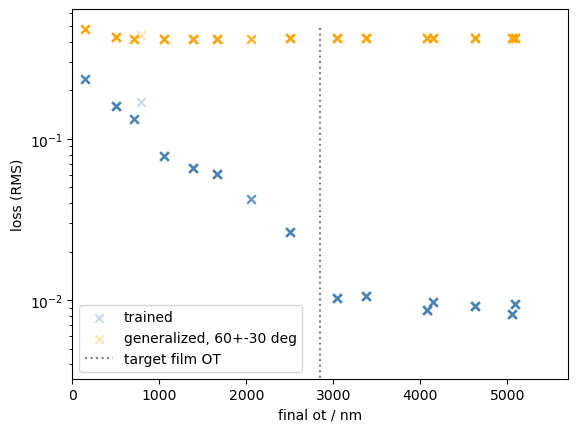

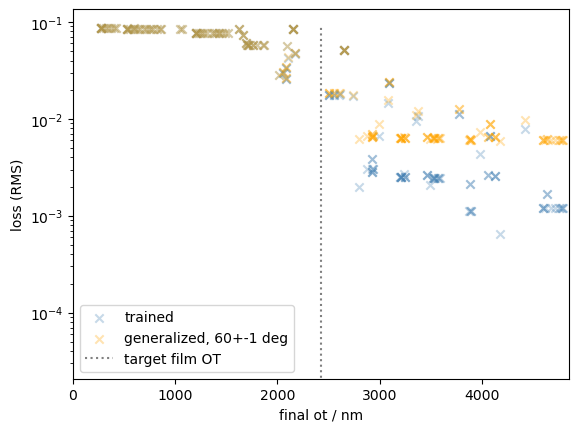

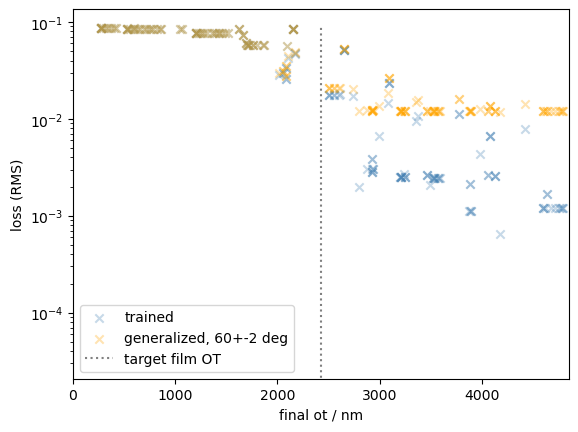

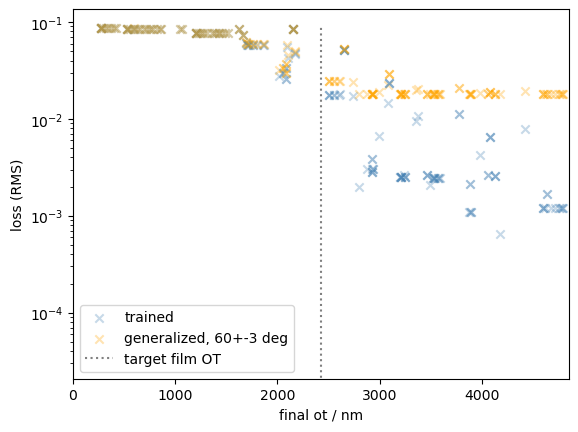

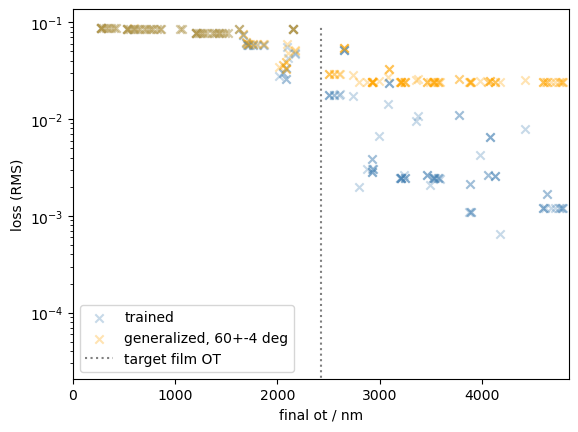

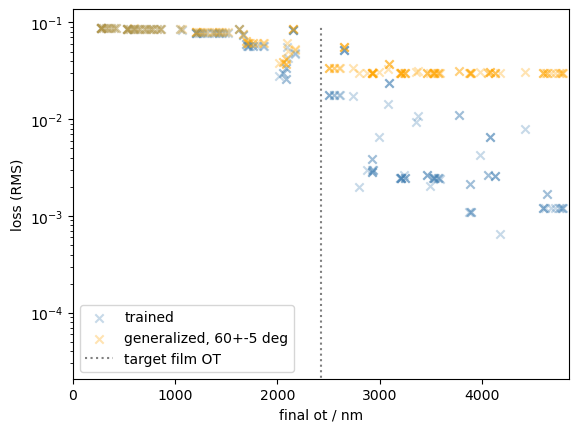

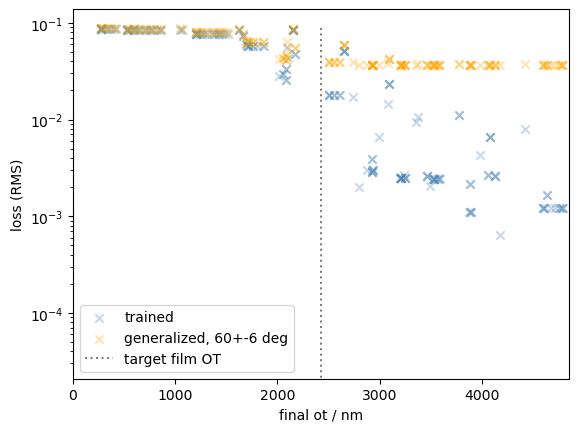

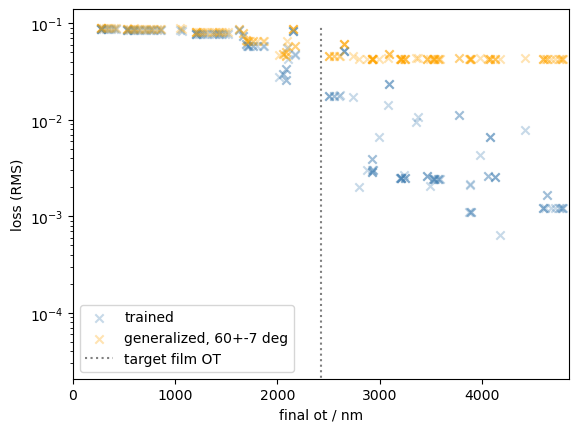

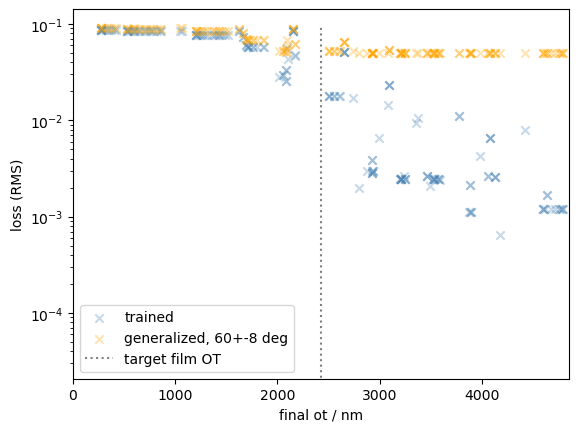

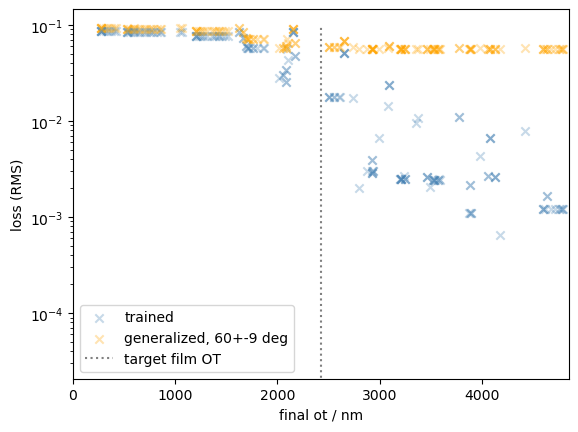

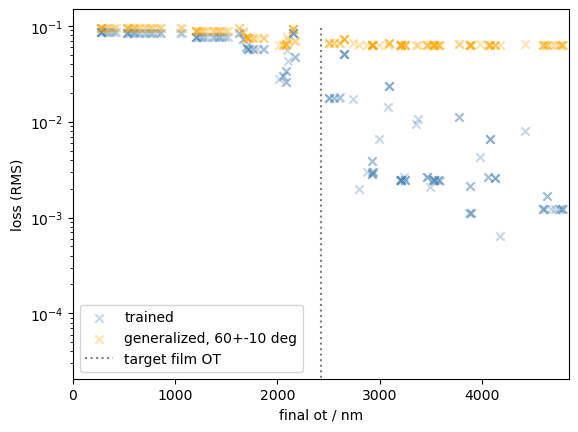

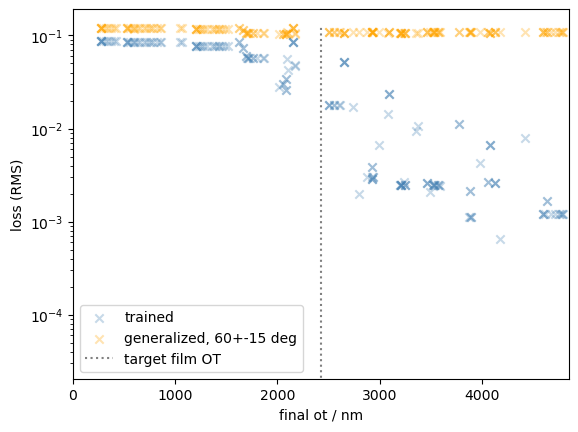

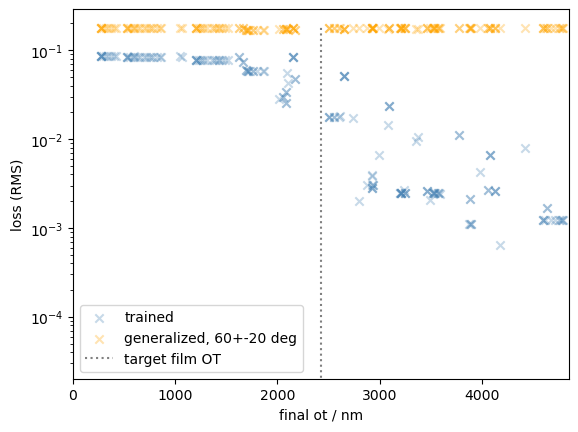

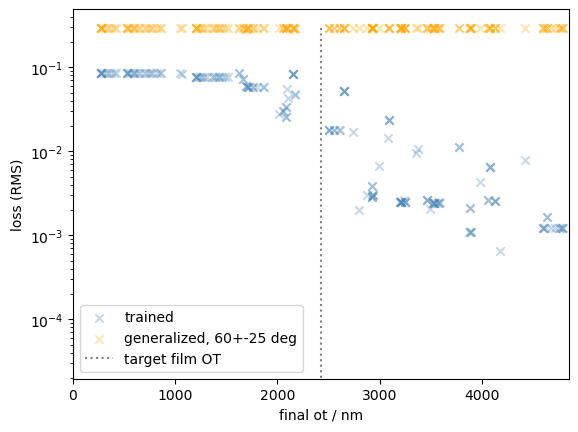

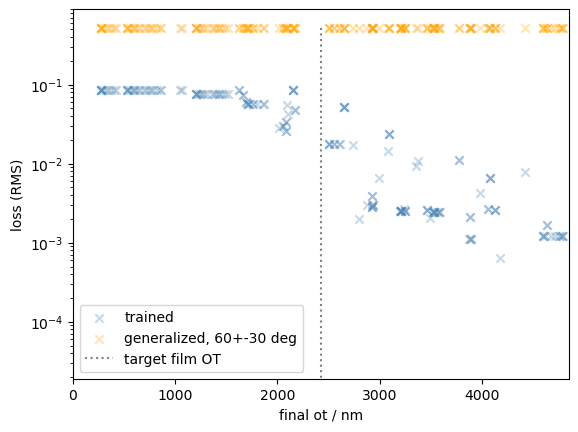

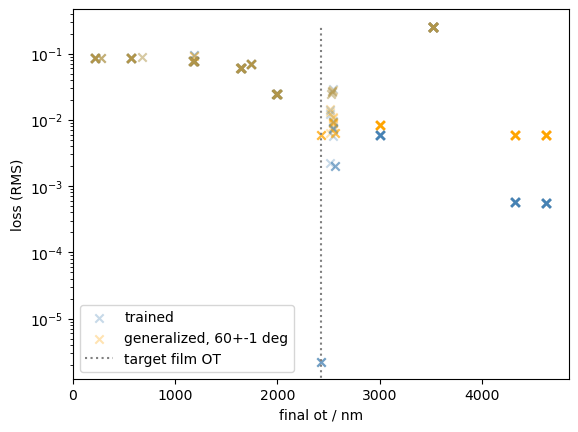

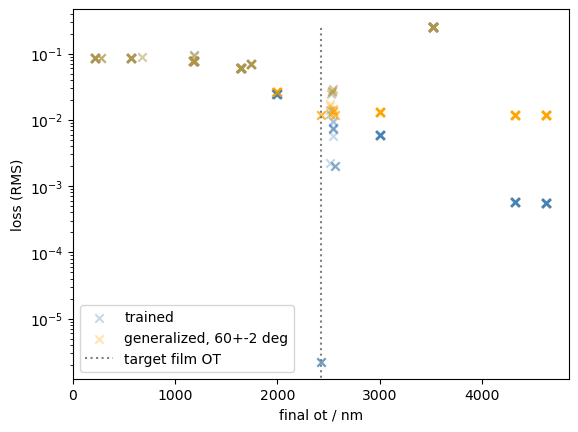

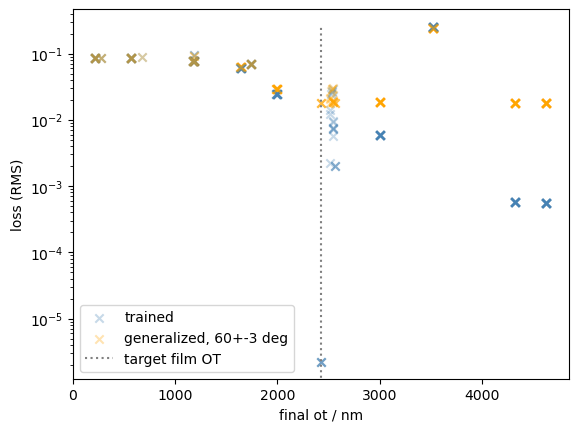

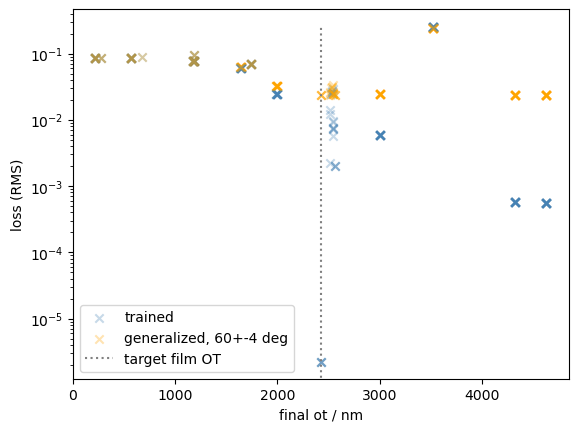

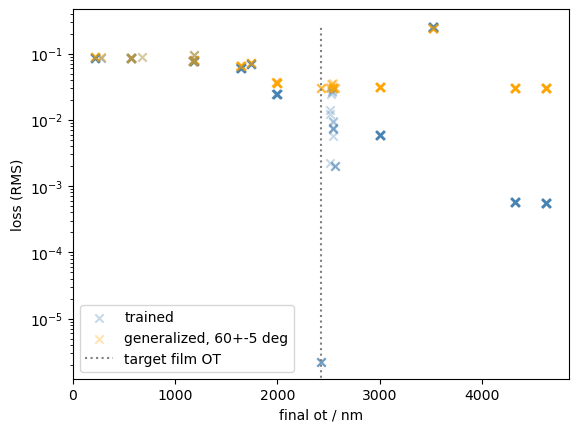

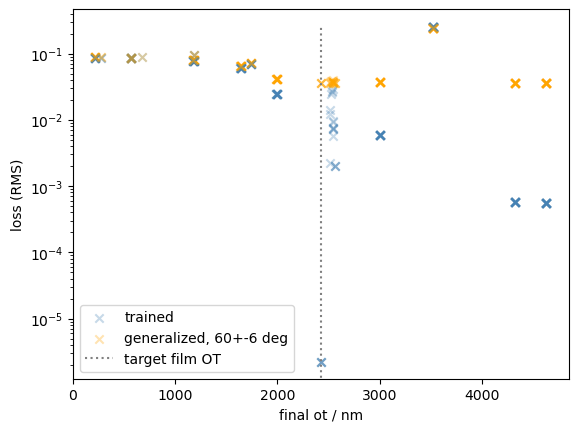

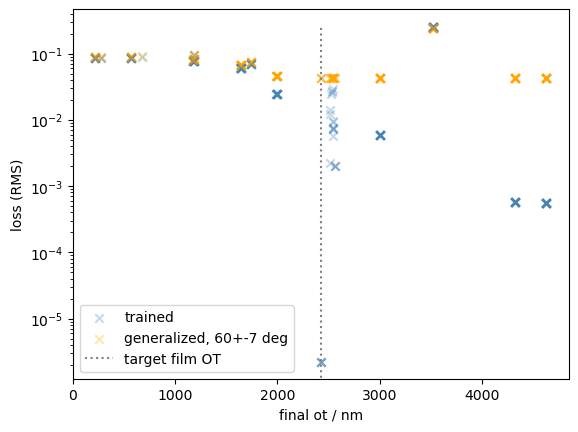

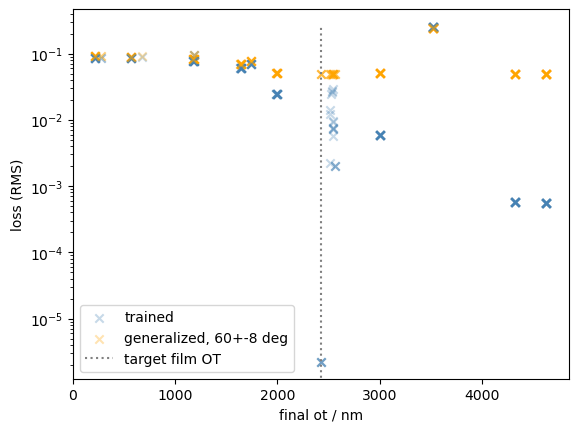

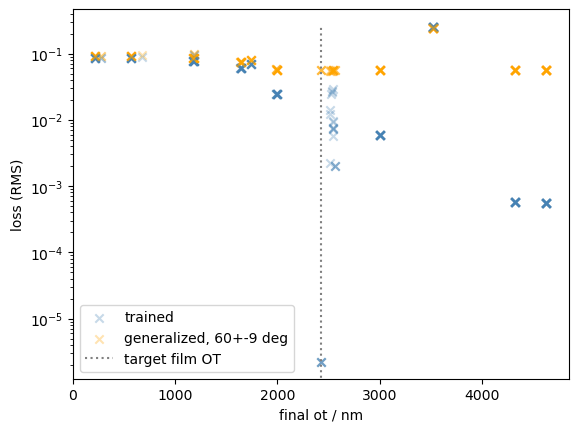

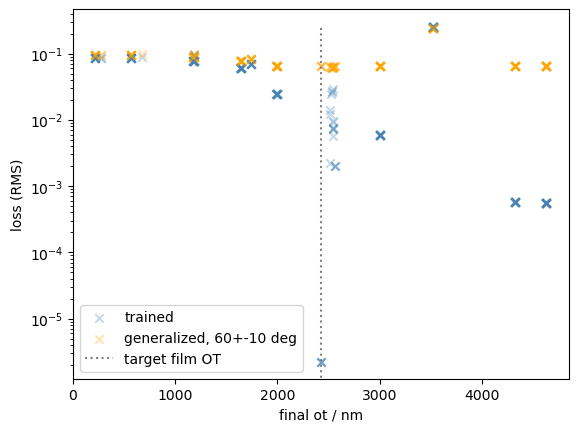

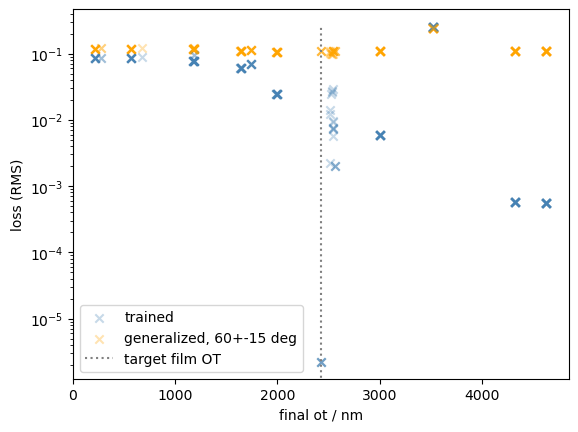

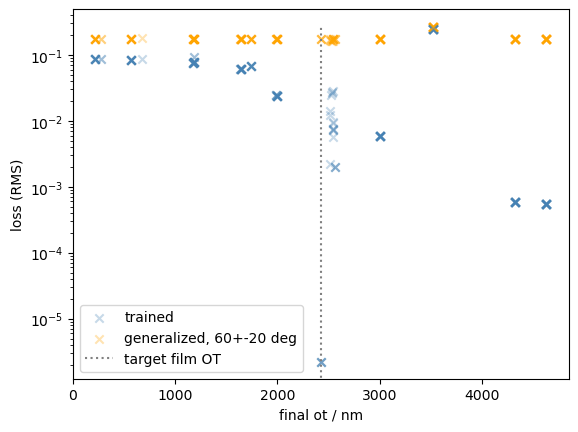

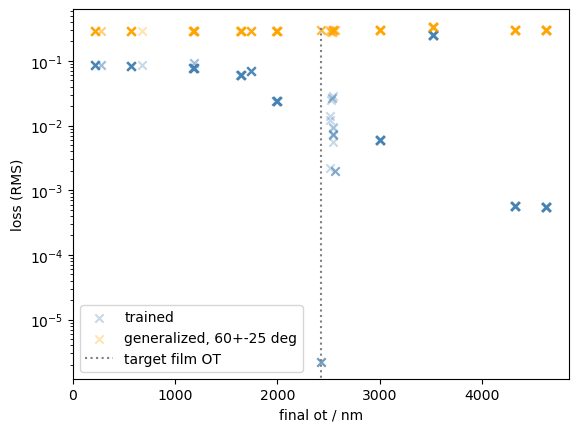

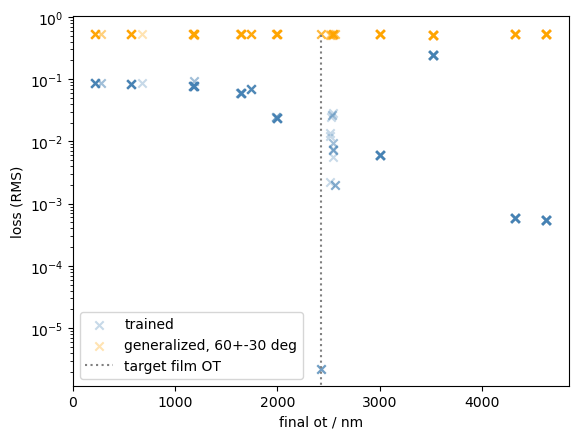

In [4]:
def plot_generalization(designs, file_dir):
    gen_angs_biases = list(range(1, 10)) + list(range(10, 35, 5))
    wl = 750.

    gen_number = len(gen_angs_biases)

    for i, gen_angs_bias in zip(range(gen_number), gen_angs_biases):
        gen_angs = [60. - gen_angs_bias, 60. + gen_angs_bias]

        def generalize(designs: list[DesignSimple]):
            gen_designs = []
            for design in designs:
                gen_design = copy.deepcopy(design)
                gen_design
                for inc_ang in gen_angs:
                    gen_design.target_film.remove_spec_param(INC_ANG, WLS) # remove original one
                    gen_design.target_film.add_spec_param(inc_ang, WLS)
                gen_design.calculate_loss()
                gen_designs.append(gen_design)
            return gen_designs

        gen_designs = generalize(designs)

        def plot_final(design_list: list[DesignSimple], gen_designs_list: list[DesignSimple]): # bad variabe naming!
            fig, ax = plt.subplots(1, 1)
            for design, gen_design in zip(design_list, gen_designs_list):
                ax.scatter(design.get_current_ot(wl), design.loss, c='steelblue', marker='x', alpha=0.3)
                ax.scatter(gen_design.get_current_ot(wl), gen_design.loss, c='orange', marker='x', alpha=0.3)

            # scatter the first dot for the legend
            design, gen_design = designs[0], gen_designs[0]
            ax.scatter(design.get_current_ot(wl), design.loss, c='steelblue', marker='x', label='trained', alpha=0.3)
            ax.scatter(gen_design.get_current_ot(wl), gen_design.loss, c='orange', marker='x', label=f'generalized, 60+-{gen_angs_bias} deg', alpha=0.3)

            target_ot = design.get_target_ot(wl)
            ax.plot([target_ot, target_ot], ax.get_ylim(), label='target film OT', c='gray', ls=':')
            
            
            ax.legend()
            ax.set_xlabel('final ot / nm')
            ax.set_ylabel('loss (RMS)')
            ax.set_xlim(0, target_ot * 2)
            # ax.set_ylim(0, None) # set lower bound of y to zero
            ax.set_yscale('log')
            fig.savefig(file_dir+f"gen_60+-{gen_angs_bias}-wrt_final_ot_log.png", dpi=300)
           # plot one loss-init ot figure each iter

        def plot_init(design_list: list[DesignSimple], gen_designs_list: list[DesignSimple]): # bad variabe naming!
            fig, ax = plt.subplots(1, 1)
            for design, gen_design in zip(design_list, gen_designs_list):
                ax.scatter(design.get_init_ot(wl), design.loss, c='steelblue', marker='x', alpha=0.3)
                ax.scatter(gen_design.get_init_ot(wl), gen_design.loss, c='orange', marker='x', alpha=0.3)

            # scatter the first dot for the legend
            design, gen_design = designs[0], gen_designs[0]
            ax.scatter(design.get_init_ot(wl), design.loss, c='steelblue', marker='x', label='trained', alpha=0.3)
            ax.scatter(gen_design.get_init_ot(wl), gen_design.loss, c='orange', marker='x', label=f'generalized, 60+-{gen_angs_bias} deg', alpha=0.3)

            target_ot = design.get_target_ot(wl)
            ax.plot([target_ot, target_ot], ax.get_ylim(), label='target film OT', c='gray', ls=':')
            
            
            ax.legend()
            ax.set_xlabel('initial ot / nm')
            ax.set_ylabel('loss (RMS)')
            ax.set_xlim(0, target_ot * 2)
            # ax.set_ylim(0, 0.4) # set lower bound of y to zero
            ax.set_yscale('log')
            fig.savefig(file_dir+f"gen_60+-{gen_angs_bias}-wrt_initial_ot_log.png", dpi=300)
 
        # plot_init(designs, gen_designs)
        plot_final(designs, gen_designs)

for run_name in runs_dict:
    plot_generalization(runs_dict[run_name]['designs'], runs_dict[run_name]['save_fig_dir']) # time: about 4 mins



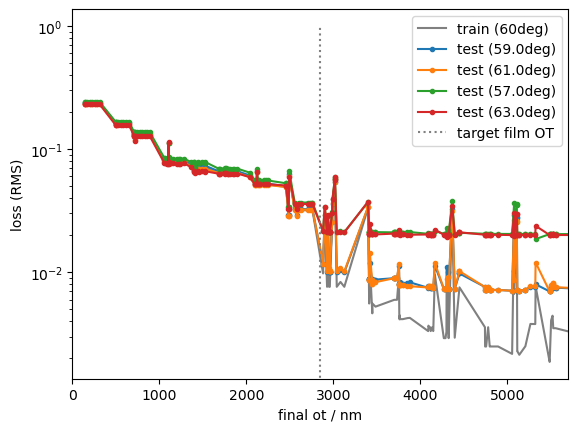

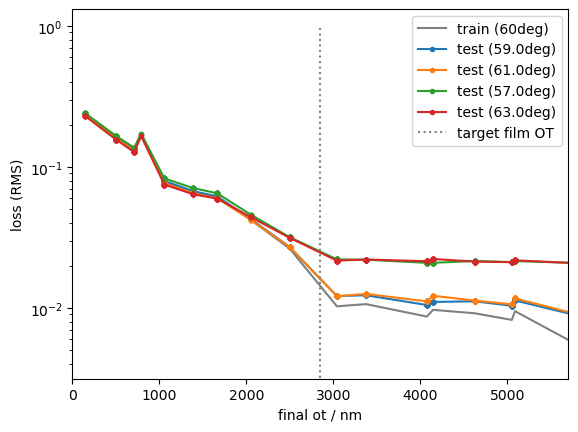

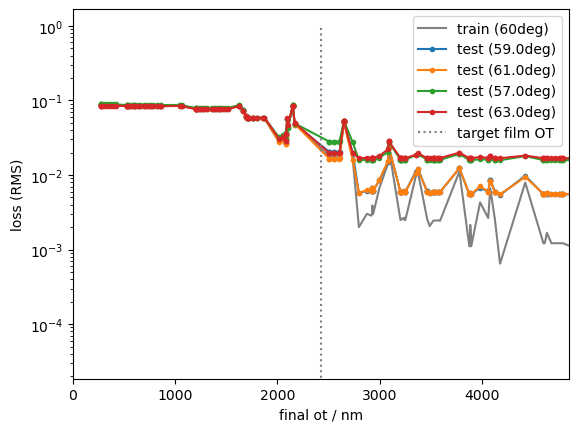

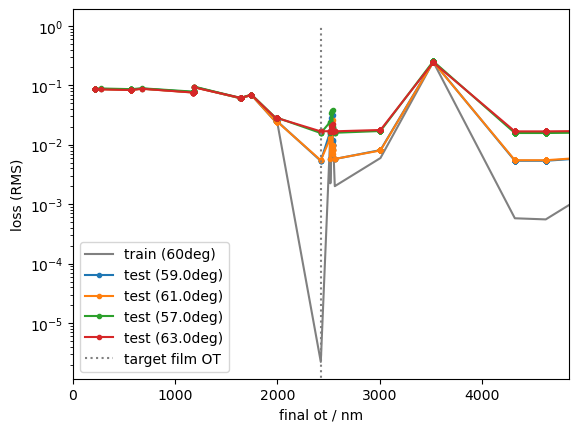

In [12]:
def plot_generalization_inone(designs: list[DesignSimple], save_fig_dir, x_axis='init'):
    gen_angs_biases = [1, 3]
    wl = 750.

    gen_number = len(gen_angs_biases)


    # sort design against init/final ot
    if x_axis == 'final':
        get_x = lambda x: x.get_current_ot()
    elif x_axis == 'init':
        get_x = lambda x: x.get_init_ot()
    else:
        assert False, 'should not run here'

    designs, _ = sort_by_ith_list(designs, [get_x(design) for design in designs], index=1)

    def generalize(designs: list[DesignSimple], gen_ang):
            gen_loss = []
            for design in designs:
                tmp_design = copy.deepcopy(design)
                tmp_design.target_film.remove_spec_param(INC_ANG, WLS)
                tmp_design.target_film.add_spec_param(gen_ang, WLS)
            
                gen_loss.append(tmp_design.calculate_loss())
            return gen_loss
    
    # plot figure: boefore generalize
    fig, ax = plt.subplots(1, 1)
    x = [get_x(design) for design in designs]
    original_loss = [design.calculate_loss() for design in designs]
    ax.plot(x, original_loss, label='train (60deg)', ls='-', color='grey')

    for gen_ang in [ang for gen_angs_bias in gen_angs_biases for ang in [60. - gen_angs_bias, 60. + gen_angs_bias]]:
        gen_loss = generalize(designs, gen_ang)
        ax.plot(x, gen_loss, label=f'test ({gen_ang}deg)', ls='-', marker='.')

    target_ot = designs[0].get_target_ot(wl)
    ax.plot([target_ot, target_ot], [0, 1], label='target film OT', c='gray', ls=':')
    ax.legend()
    ax.set_xlabel(f'{x_axis} ot / nm')
    ax.set_ylabel('loss (RMS)')
    ax.set_xlim(0, target_ot * 2)
    # ax.set_ylim(0, 0.4) # set lower bound of y to zero
    ax.set_yscale('log')
    fig.savefig(save_fig_dir + f'log_gen_loss-{x_axis}_ot.png', dpi=300)

for run_name in runs_dict:
    plot_generalization_inone(runs_dict[run_name]['designs'], runs_dict[run_name]['save_fig_dir'], 'final')
 

In [13]:
# find suspicious run
i = 0
for design in runs_dict['TiO2_4layers']['designs']:
    i += 1
    if design.calculate_loss() < 1e-4:
        print(i)

90
91
92
93
